In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for any augmentations
from tensorflow import keras
import tensorflow as tf 
import os                # to handle files or folders
import cv2               # for images(OpenCV)
import numpy as np       
import matplotlib.pyplot as plt  
from tensorflow.keras.utils import to_categorical  # One-Hot

## data path

In [2]:
data_path=r"../data/fruits/images"
img_size=(150,150)

## class names and it's indices

In [3]:
class_names = sorted(os.listdir(data_path))
class_indices = {name: i for i, name in enumerate(class_names)}  
print(f"Class names: {class_names}")
print(f"Class indices: {class_indices}")

Class names: ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']
Class indices: {'apple fruit': 0, 'banana fruit': 1, 'cherry fruit': 2, 'chickoo fruit': 3, 'grapes fruit': 4, 'kiwi fruit': 5, 'mango fruit': 6, 'orange fruit': 7, 'strawberry fruit': 8}


## load images

In [4]:
train_data = []  # List to store images
train_labels = []  # List to store labels

# Get the class names from the folder names
class_names = sorted(os.listdir(data_path))  
class_indices = {name: i for i, name in enumerate(class_names)}  # Mapping class names to indices

# Load images and their corresponding labels
# load the class
for class_name in class_names:
    class_folder = os.path.join(data_path, class_name)  # Path to the current class folder
    if not os.path.isdir(class_folder):  # Skip if it's not a folder
        continue
        #load the image
    for file in os.listdir(class_folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image
            img_path = os.path.join(class_folder, file)  # Path to the image
            img = cv2.imread(img_path)  # Read the image using OpenCV
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize the image to the specified size
                img = img.astype('float32') / 255.0  # Normalize the image (scale pixel values between 0 and 1)
                train_data.append(img)  # Add the image to the training data
                train_labels.append(class_indices[class_name])  # Add the label to the training labels


In [5]:
# Convert lists to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)

## split data to train and test

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42, stratify=train_labels)


In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(f"Train images shape: {X_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Train images shape: (287, 150, 150, 3)
Test images shape: (72, 150, 150, 3)
Train labels shape: (287, 9)
Test labels shape: (72, 9)


## print images in plot

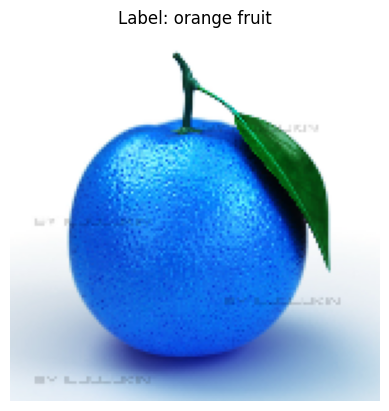

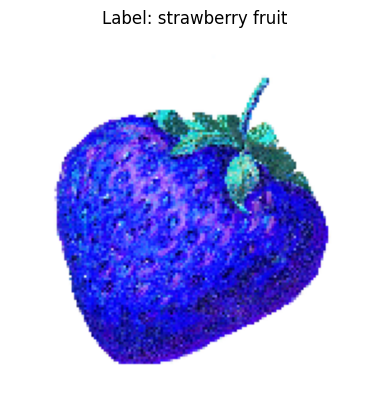

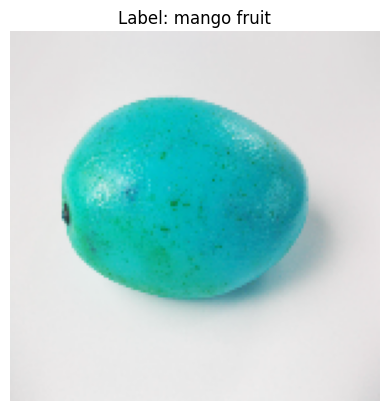

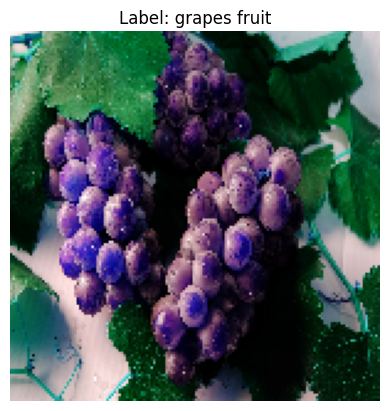

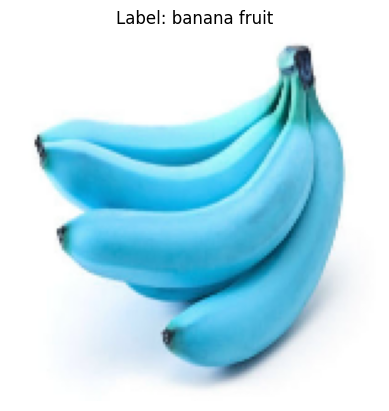

In [9]:
for i in range(5):  
    img = X_train[i]
    label = y_train[i]

    # Get the index of the label from one-hot encoding
    class_index = np.argmax(label)  # Get class index from one-hot
    class_name = class_names[class_index]  # Get the class name

    plt.imshow(img)
    plt.title(f"Label: {class_name}")
    plt.axis('off')
    plt.show()

## Nueral network model

In [54]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# no update for weigth of the base model
base_model.trainable = False

# define the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(9, activation='softmax')  # num of classes
])


C:\Users\AyA\AppData\Local\Temp\ipykernel_11404\1493579831.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


 # Model Compilation

In [55]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [56]:
history = model.fit(X_train, y_train, epochs=25, batch_size=16)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.1296 - loss: 3.0962
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.3223 - loss: 1.9257
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.5097 - loss: 1.4831
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.6061 - loss: 1.2191
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.6140 - loss: 1.0505
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.7507 - loss: 0.8115
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.7437 - loss: 0.7827
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.7984 - loss: 0.6815
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.7933 - loss: 0.5714
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.8019 - loss: 0.5254
Epoch 11/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.8678 - loss: 0.4264
Epoch 12/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/ste

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(9, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=15, batch_size=16, callbacks=[early_stopping])


Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 258ms/step - accuracy: 0.1650 - loss: 2.2063
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.2945 - loss: 1.9661
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.3378 - loss: 1.7160
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.5329 - loss: 1.4114
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.5206 - loss: 1.2976
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.5703 - loss: 1.1981
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 0.7203 - loss: 0.9348
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.6499 - loss: 0.9422
Epoch 9/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - accuracy: 0.7371 - loss: 0.7654
Epoch 10/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.8105 - loss: 0.5785
Epoch 11/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.7498 - loss: 0.6436
Epoch 12/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/ste

# Model evaluation

In [57]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.8859 - loss: 0.3541
Test Accuracy: 88.89%


In [76]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path =r"../data/prediction/fruit.jpg"


img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)

# توسيع البُعد ليصبح (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0

predictions = model.predict(img_array)


predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted class: [7]


In [77]:
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = r"../data/prediction/download.jpeg"


img = image.load_img(img_path, target_size=(150, 150))


img_array = image.img_to_array(img)

# توسيع البُعد ليصبح (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0


predictions = model.predict(img_array)


predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: [7]


In [78]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"../data/prediction/download (1).jpeg"

img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: [5]


In [79]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"../data/prediction/image1.jpg"

img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted class: [7]


In [80]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"../data/prediction/th.jpeg"

img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class: [6]


In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"../data/prediction/th (1).jpeg"

img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: [4]


In [82]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"../data/prediction/th (2).jpeg"

img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted class: [1]
